# HA4

Task1

In [11]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('fivethirtyeight')

from sklearn.datasets import load_boston
boston = load_boston()

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=150, random_state=100)

In [17]:
x = pd.DataFrame(boston.data,columns=boston.feature_names)
y = pd.DataFrame(boston.target,columns=['price'])
names = boston.feature_names

df = pd.concat([y,x],axis = 1)
df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 42)


,price,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,28.7,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,22.9,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,27.1,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,16.5,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,18.9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [35]:
x_sc = scaler.fit(df_train[names].values)

x_train = x_sc.transform(df_train[names].values)
x_test = x_sc.transform(df_test[names].values)

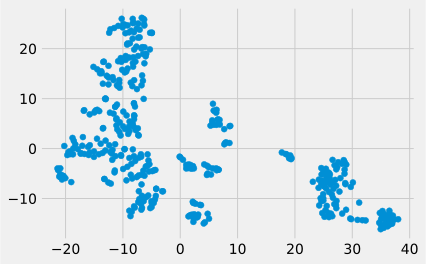

In [36]:
x_train_tsne = tsne.fit_transform(x_train)

plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1])
plt.show()

Task 2

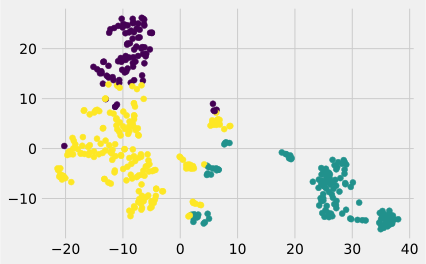

In [37]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)

x_train_kmeans = km.fit(x_train)
#x_train_kmeans.labels_

plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1], c=x_train_kmeans.labels_)
plt.show()


In [38]:
df1 = df_train[['price', 'CRIM']].copy()
df1['label'] = x_train_kmeans.labels_

some_stat = df1.groupby(['label']).agg({'price':['mean'], 'CRIM':['mean']})
some_stat.columns = ['_'.join(tup[::-1]) for tup in some_stat.columns.values]
some_stat = some_stat.reset_index()
some_stat


,label,mean_price,mean_CRIM
0,0,27.788372,0.073566
1,1,16.165354,10.797028
2,2,24.958115,0.421660


Task 3

In [41]:
x_test_kmeans = x_train_kmeans.predict(x_test)
x_test_kmeans

array([2, 0, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 0, 1, 0, 0,
       2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 1, 2, 2, 1, 2, 2, 0, 2, 2, 2, 1, 1, 0, 2, 2, 0, 0, 2, 2, 0, 2,
       1, 0, 0, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2,
       2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2])

In [42]:
df1 = df_test[['price', 'CRIM']].copy()
df1['label'] = x_test_kmeans

some_stat = df1.groupby(['label']).agg({'price':['mean'], 'CRIM':['mean']})
some_stat.columns = ['_'.join(tup[::-1]) for tup in some_stat.columns.values]
some_stat = some_stat.reset_index()
some_stat

,label,mean_price,mean_CRIM
0,0,31.350000,0.062060
1,1,16.437143,10.165531
2,2,21.860784,0.266079


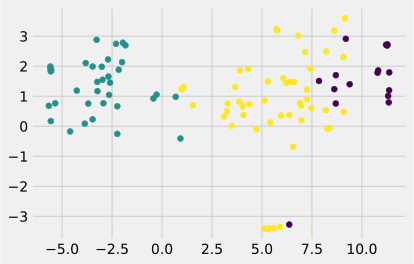

In [44]:
x_test_tsne = tsne.fit_transform(x_test)

plt.scatter(x_test_tsne[:, 0], x_test_tsne[:, 1], c = x_test_kmeans)
plt.show()